# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
import warnings 
warnings.filterwarnings('ignore')

# Read data

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Itvedant class/Itvedant Home work/glass.csv')

# Data Inspection

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df.shape

(214, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


# Checking Null Values

In [13]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# CHecking Skweness

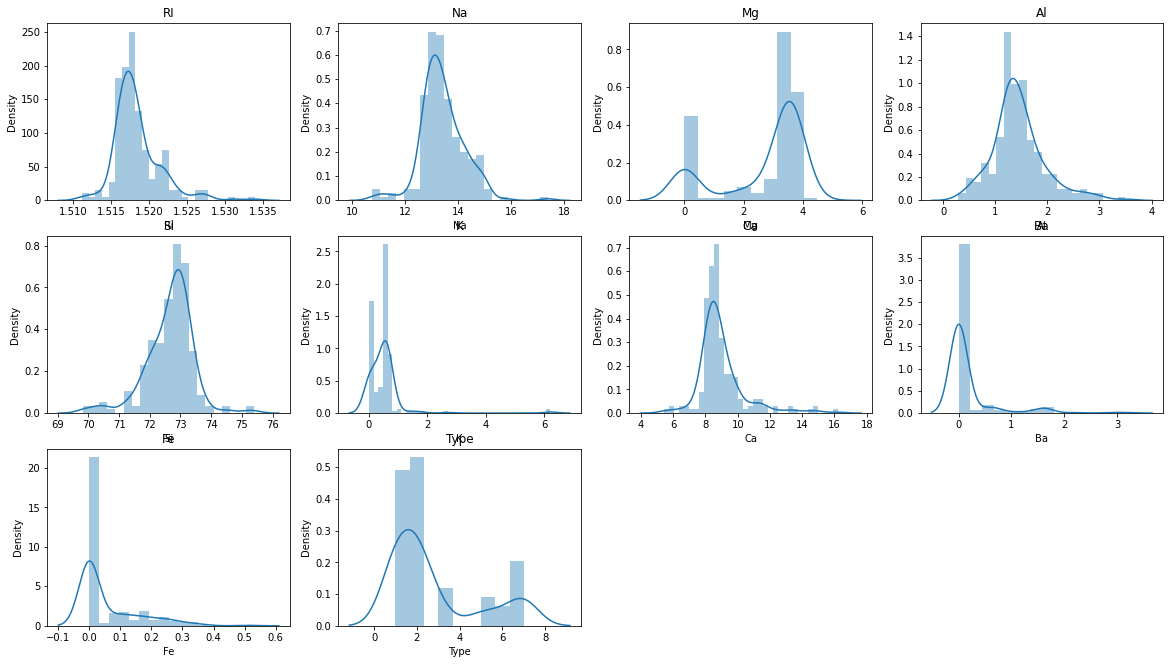

In [15]:
i = 1
plt.figure(figsize=(20,15))
for x in df.columns:
  plt.subplot(4,4,i)
  plt.title(x)
  sns.distplot(df[x])
  i+=1

# Create X and Y

In [16]:
X = df.drop('Type',axis=1)
X = np.cbrt(X) # Cube root transformation to handle skewness

In [17]:
Y = df.Type

In [18]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.150034,2.389304,1.649740,1.032280,4.155926,0.391487,2.060643,0.000000,0.0
1,1.149176,2.403813,1.532619,1.107932,4.174180,0.782974,1.985732,0.000000,0.0
2,1.148815,2.382864,1.525490,1.154800,4.179148,0.730614,1.981496,0.000000,0.0
3,1.149189,2.363928,1.545286,1.088587,4.171883,0.829134,2.018168,0.000000,0.0
4,1.149129,2.367502,1.535452,1.074337,4.180865,0.819321,2.005816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.148828,2.418149,0.000000,1.422757,4.171883,0.430887,2.093860,1.019613,0.0
210,1.148985,2.461820,0.000000,1.257818,4.180484,0.000000,2.032793,1.167165,0.0
211,1.149943,2.430626,0.000000,1.264107,4.187339,0.000000,2.036014,1.179274,0.0
212,1.148899,2.431754,0.000000,1.247194,4.190948,0.000000,2.039226,1.162251,0.0


# Label Encoding Y

In [19]:
Y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [20]:
Y = Y.map({1:0,2:1,3:2,5:3,6:4,7:5})

# Scaling

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [22]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [23]:
X.shape[1]

9

In [24]:
Y.value_counts()

1    76
0    70
5    29
2    17
3    13
4     9
Name: Type, dtype: int64

In [25]:
X_test_ss.shape

(43, 9)

In [26]:
y_train.value_counts()

1    61
0    56
5    23
2    14
3    10
4     7
Name: Type, dtype: int64

In [27]:
y_test.value_counts()

1    15
0    14
5     6
3     3
2     3
4     2
Name: Type, dtype: int64

# Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [48]:
model = Sequential()
model.add(Dense(45, activation="relu", input_dim=9))
model.add(Dense(30, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(22, activation="relu"))
model.add(Dense(18, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(6, activation="softmax")) 

In [49]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [50]:
model.fit(X_train_ss,y_train,epochs=300, batch_size=2)

Epoch 1/300
86/86 [==============================] - 1s 2ms/step - loss: 1.7430
Epoch 2/300
86/86 [==============================] - 0s 2ms/step - loss: 1.4913
Epoch 3/300
86/86 [==============================] - 0s 2ms/step - loss: 1.2279
Epoch 4/300
86/86 [==============================] - 0s 2ms/step - loss: 1.1240
Epoch 5/300
86/86 [==============================] - 0s 2ms/step - loss: 1.0569
Epoch 6/300
86/86 [==============================] - 0s 2ms/step - loss: 1.0044
Epoch 7/300
86/86 [==============================] - 0s 2ms/step - loss: 0.9819
Epoch 8/300
86/86 [==============================] - 0s 2ms/step - loss: 0.9613
Epoch 9/300
86/86 [==============================] - 0s 2ms/step - loss: 0.9377
Epoch 10/300
86/86 [==============================] - 0s 2ms/step - loss: 0.9111
Epoch 11/300
86/86 [==============================] - 0s 2ms/step - loss: 0.8957
Epoch 12/300
86/86 [==============================] - 0s 2ms/step - loss: 0.8931
Epoch 13/300
86/86 [=================

In [51]:
y_pred = model.predict(X_test_ss)

In [52]:
y_pred = y_pred.argmax(axis=1)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.83      0.67      0.74        15
           2       0.50      0.33      0.40         3
           3       1.00      0.67      0.80         3
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.84      0.69      0.74        43
weighted avg       0.81      0.79      0.78        43

